### Regression
- 선형회귀 : 종속변수와 하나 이상의 설명변수(독립변수)간의 관계를 모델링하는 선형접근법

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [4]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
# 키(meeter)와 몸무게(kg)
heights = [[1.6], [1.65], [1.7], [1.77], [1.85]]
weights = [[60], [65], [70], [77], [85]]

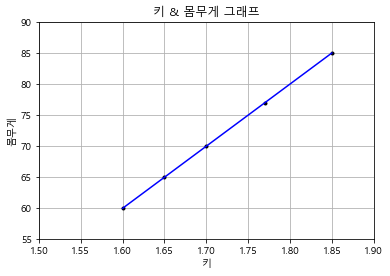

In [15]:
plt.title('키 & 몸무게 그래프')
plt.xlabel('키')
plt.ylabel('몸무게')
plt.grid()

plt.plot(heights, weights, 'k.')
plt.axis([1.5, 1.9, 55, 90]) # 축의 범위 설정

# 선형 회귀 선 시각화
plt.plot(heights, lr_model.predict(heights), color = 'blue')

plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr_model = LinearRegression()

# fit : 리스트 또는 배열 형태의 인수를 필요로 한다.
lr_model.fit(heights, weights)

LinearRegression()

In [13]:
weight_pred = lr_model.predict([[1.7], [1.75]])
weight_pred

array([[70.],
       [75.]])

In [39]:
# auto-mpg.csv를 이용한 선형회귀
import pandas as pd
import numpy as np

row_data = pd.read_csv('./data/auto-mpg.csv', header = None)
row_data.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']
row_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [40]:
# 데이터의 자료형 확인
row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [41]:
row_data['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [43]:
# horsepower 전처리
# '?'를 np.nan으로 변경
row_data['horsepower'].replace('?', np.nan, inplace = True)
row_data['horsepower'].unique()

# nan 행을 삭제
# subset : 해당 컬럼열에 대해서만 nan이 있으면 행을 삭제하겠다.
row_data.dropna(subset = ['horsepower'], axis = 0, inplace=  True)

# 문자열을 실수형으로 변환
row_data['horsepower'] = row_data['horsepower'].astype(np.float)

row_data['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [44]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [45]:
# 분석에 활용할 변수를 선택
cor_df = row_data[['mpg', 'cylinders', 'horsepower', 'weight']]
cor_df.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


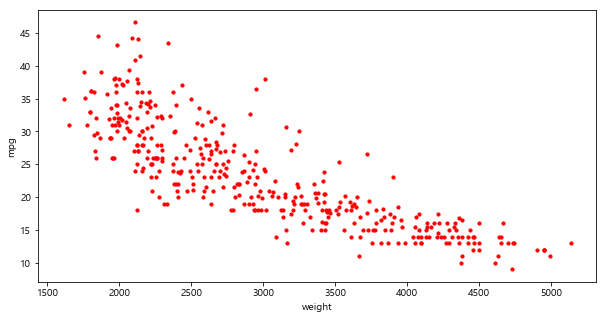

In [51]:
# 선형관계 파악을 위한 산점도 그래프
cor_df.plot(kind = 'scatter', x = 'weight', y = 'mpg', c = 'red', s = 10, figsize = (10, 5))
plt.show()

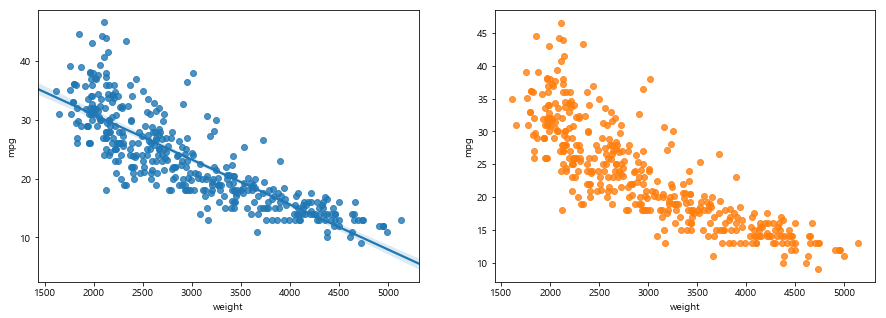

In [56]:
# seaborn 산점도
fig = plt.figure(figsize = (15, 5))

# 서브플롯 생성
area01 = fig.add_subplot(1, 2, 1)
area02 = fig.add_subplot(1, 2, 2)

sns.regplot(x = 'weight', y = 'mpg', data = cor_df, ax = area01)
sns.regplot(x = 'weight', y = 'mpg', data = cor_df, ax = area02, fit_reg = False)

plt.show()

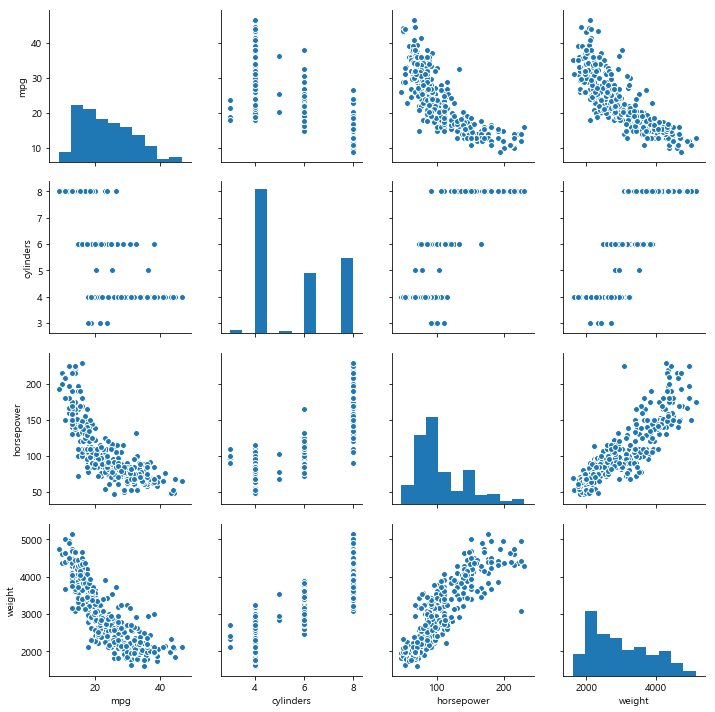

In [57]:
sns.pairplot(cor_df)
plt.show()

In [73]:
X = cor_df[['weight', 'cylinders', 'horsepower']] # 독립 변수
y = cor_df['mpg'] # 종속 변수

In [74]:
# 데이터 세트 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

print(len(X_train))
print(len(X_test))

313
79


In [75]:
from sklearn.linear_model import LinearRegression
auto_lr_model = LinearRegression()

In [76]:
auto_lr_model.fit(X_train, y_train)

# 결정계수
# 1에 가까울수록 성능이 높다.
r_square = auto_lr_model.score(X_test, y_test)
print('결정계수 :', r_square)

결정계수 : 0.7114913212756986


In [77]:
# 회귀의 기울기
print('기울기 :', auto_lr_model.coef_)

# 회귀의 절편
print('절편 :', auto_lr_model.intercept_)

기울기 : [-0.005262   -0.35376808 -0.04359149]
절편 : 45.707410007109324


In [78]:
# 모델에 전체 X 데이터를 입력하여 예측값. 실제 y
y_pred = auto_lr_model.predict(X)

result_df = pd.DataFrame({
    'guess' : y_pred,
    'answer' : y
})

result_df.head()

,guess,answer
0,18.772324,18.0
1,16.252104,15.0
2,18.258310,18.0
3,18.274096,16.0
4,18.625819,17.0


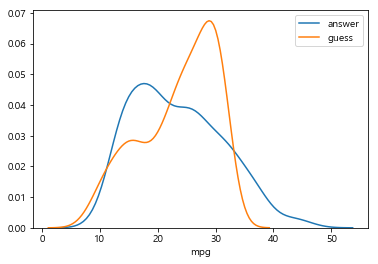

In [79]:
sns.distplot(y, hist = False, label = 'answer')
sns.distplot(y_pred, hist = False, label = 'guess')
plt.show()